In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Iris_Aidah.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- Clustering itu tidak memperhatikan balancing terhadap class, dia tidak perlu itu.
- K-means memperhatikan datanya harus numerik dan tidak string, jika string maka harus di encoding terlebih dahulu...

- untuk membuat algo lebih smooth, skala data harus diseragamkan
- teknik penyeragaman bisa menggunakan min max scaler atau standart scaller

In [7]:
X = data.drop(columns = 'Species')
y = data['Species']

In [8]:
df = data.drop(columns = 'Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Data duplikat ditemukan:")
    print(duplicates)
else:
    print("Tidak ada data duplikat")

Data duplikat ditemukan:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica


In [11]:
drop_df = df.drop_duplicates()

In [12]:
duplicates_1 = drop_df[drop_df.duplicated()]

if not duplicates_1.empty:
    print("Data duplikat ditemukan:")
    print(duplicates_1)
else:
    print("Tidak ada data duplikat")

Tidak ada data duplikat


In [13]:
sepal_lx = drop_df['SepalLengthCm']
sepal_ly = drop_df['SepalWidthCm']

<Axes: >

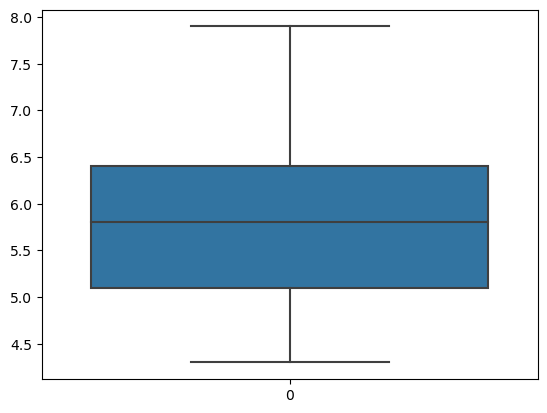

In [14]:
sns.boxplot(sepal_lx)


<Axes: >

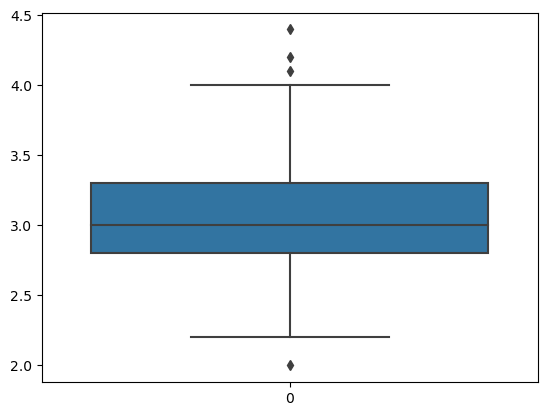

In [15]:
sns.boxplot(sepal_ly)

In [16]:
print(np.where(sepal_ly>4.0))

(array([15, 32, 33], dtype=int64),)


In [17]:
# zscore 
from scipy import stats
 
z = np.abs(stats.zscore(sepal_ly))
print(z)

0      1.019971
1      0.128082
2      0.331139
3      0.101529
4      1.249582
         ...   
145    0.128082
146    1.276136
147    0.128082
148    0.790361
149    0.128082
Name: SepalWidthCm, Length: 147, dtype: float64


In [18]:
threshold = 3.05
 
# Position of the outlier
print(np.where(z > 3.05))

(array([15], dtype=int64),)


<Axes: >

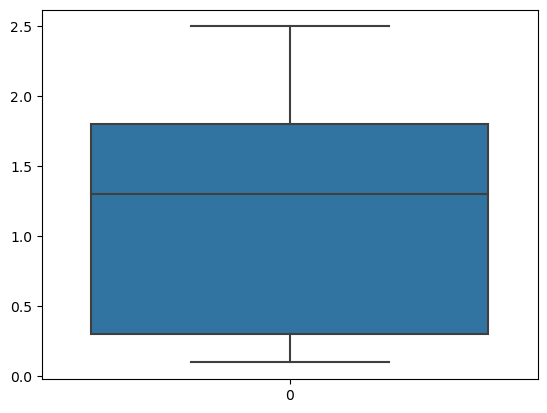

In [19]:
sns.boxplot(drop_df['PetalWidthCm'])

1. K-Means mengharuskan datanya numerik (int,float), apabila terdapat data dengan tipe data string maka harus di encode terlebig dahulu.
2. untuk membuta algoritma menjadi smooth, skala data harus diseragamkan.
3. teknik penyeragaman data bisa menggunakan MinMaxScaller atau StandarScaller

<Axes: >

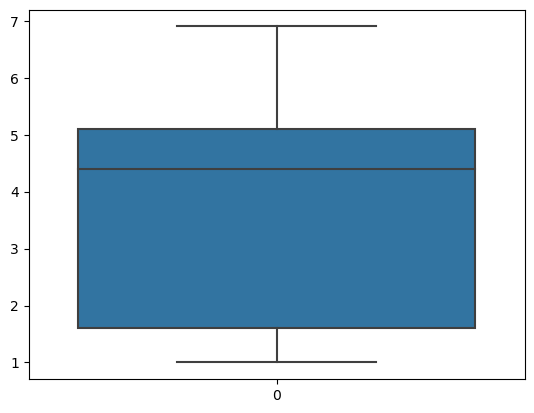

In [20]:
sns.boxplot(drop_df['PetalLengthCm'])

In [21]:
df2 = drop_df.loc[drop_df['SepalWidthCm'] != 15]

print(df2)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[147 rows x 5 columns]


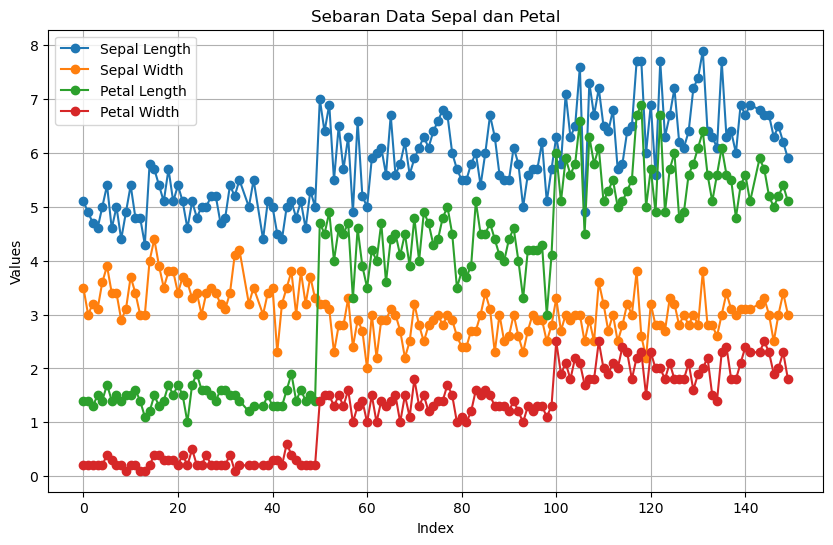

In [22]:
# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['SepalLengthCm'], label='Sepal Length', marker='o')
plt.plot(df2.index, df2['SepalWidthCm'], label='Sepal Width', marker='o')
plt.plot(df2.index, df2['PetalLengthCm'], label='Petal Length', marker='o')
plt.plot(df2.index, df2['PetalWidthCm'], label='Petal Width', marker='o')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Index')
plt.ylabel('Values')

# Menambahkan legenda
plt.legend()

# Menampilkan grid
plt.grid()

# Menampilkan chart
plt.title('Sebaran Data Sepal dan Petal')
plt.show()


## Normalisasi

In [23]:
X = df2.drop(columns= 'Species')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


In [25]:
cols = X.columns

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler_minmax = MinMaxScaler()

In [28]:
X_scaled_data_minmax = scaler_minmax.fit_transform(X)

In [29]:
X_scaled_data_minmax = pd.DataFrame(X_scaled_data_minmax, columns = [cols])

In [30]:
X_scaled_data_minmax

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
142,0.666667,0.416667,0.711864,0.916667
143,0.555556,0.208333,0.677966,0.750000
144,0.611111,0.416667,0.711864,0.791667
145,0.527778,0.583333,0.745763,0.916667


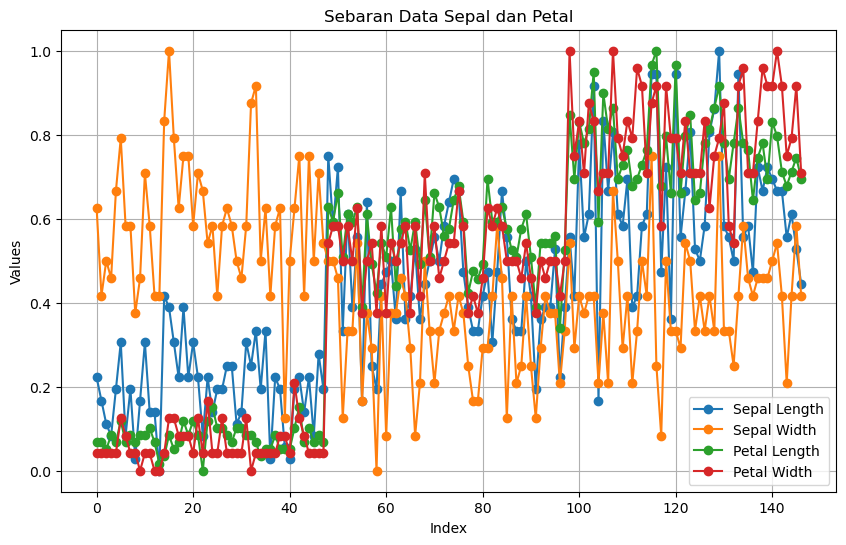

In [31]:
# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(X_scaled_data_minmax.index, X_scaled_data_minmax['SepalLengthCm'], label='Sepal Length', marker='o')
plt.plot(X_scaled_data_minmax.index, X_scaled_data_minmax['SepalWidthCm'], label='Sepal Width', marker='o')
plt.plot(X_scaled_data_minmax.index, X_scaled_data_minmax['PetalLengthCm'], label='Petal Length', marker='o')
plt.plot(X_scaled_data_minmax.index, X_scaled_data_minmax['PetalWidthCm'], label='Petal Width', marker='o')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Index')
plt.ylabel('Values')

# Menambahkan legenda
plt.legend()

# Menampilkan grid
plt.grid()

# Menampilkan chart
plt.title('Sebaran Data Sepal dan Petal')
plt.show()

## Standarisasi

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std = StandardScaler()
x_std = std.fit_transform(X)
x_std

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

In [34]:
x_std = pd.DataFrame(x_std, columns=[cols])
x_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682
143,0.536792,-1.276136,0.695748,0.915085
144,0.778842,-0.128082,0.809831,1.047484
145,0.415766,0.790361,0.923913,1.444682


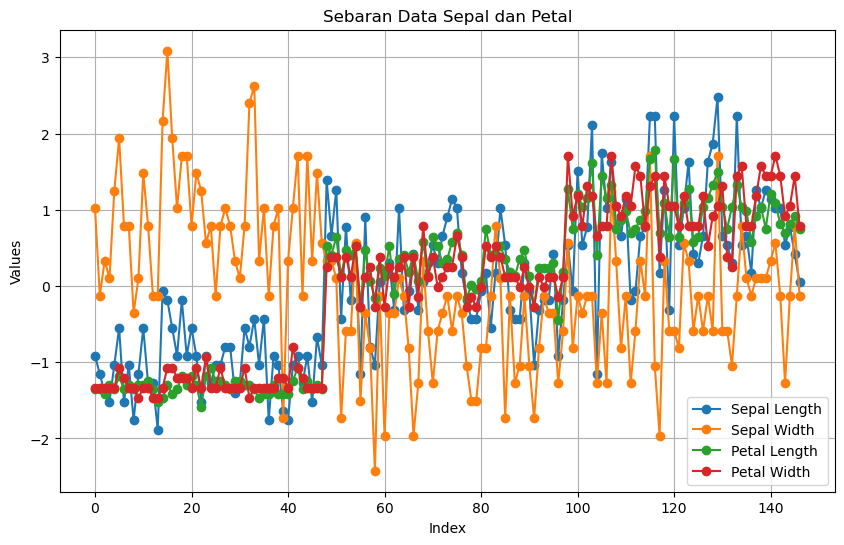

In [35]:
# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(x_std.index, x_std['SepalLengthCm'], label='Sepal Length', marker='o')
plt.plot(x_std.index, x_std['SepalWidthCm'], label='Sepal Width', marker='o')
plt.plot(x_std.index, x_std['PetalLengthCm'], label='Petal Length', marker='o')
plt.plot(x_std.index, x_std['PetalWidthCm'], label='Petal Width', marker='o')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Index')
plt.ylabel('Values')

# Menambahkan legenda
plt.legend()

# Menampilkan grid
plt.grid()

# Menampilkan chart
plt.title('Sebaran Data Sepal dan Petal')
plt.show()

In [36]:
num = {'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']}
df = pd.DataFrame(df2)

# Membuat pemetaan (mapping) dari label ke nilai numerik
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Menggunakan map() untuk mengubah kolom 'Species' menjadi nilai numerik
df['Species'] = df['Species'].map(species_mapping)
Y = df['Species']
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[147 rows x 5 columns]


## Input Library K-Means

In [37]:
from sklearn.cluster import KMeans

In [38]:
x_std ['Species'] = Y

In [39]:
df3 = x_std.copy()

In [40]:
# df3 = pd.concat([x_std,Y], axis=1) #menghubungkn 2 tabel, normalisas dg species 

In [41]:
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915509,1.019971,-1.357737,-1.335700,0.0
1,-1.157560,-0.128082,-1.357737,-1.335700,0.0
2,-1.399610,0.331139,-1.414778,-1.335700,0.0
3,-1.520635,0.101529,-1.300696,-1.335700,0.0
4,-1.036535,1.249582,-1.357737,-1.335700,0.0
...,...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682,NaN
143,0.536792,-1.276136,0.695748,0.915085,2.0
144,0.778842,-0.128082,0.809831,1.047484,2.0
145,0.415766,0.790361,0.923913,1.444682,2.0


In [42]:
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915509,1.019971,-1.357737,-1.335700,0.0
1,-1.157560,-0.128082,-1.357737,-1.335700,0.0
2,-1.399610,0.331139,-1.414778,-1.335700,0.0
3,-1.520635,0.101529,-1.300696,-1.335700,0.0
4,-1.036535,1.249582,-1.357737,-1.335700,0.0
...,...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682,NaN
143,0.536792,-1.276136,0.695748,0.915085,2.0
144,0.778842,-0.128082,0.809831,1.047484,2.0
145,0.415766,0.790361,0.923913,1.444682,2.0


In [43]:
df3.info()
df3
df_cleaned = df3.dropna()
df_cleaned.info()
df_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (SepalLengthCm,)  147 non-null    float64
 1   (SepalWidthCm,)   147 non-null    float64
 2   (PetalLengthCm,)  147 non-null    float64
 3   (PetalWidthCm,)   147 non-null    float64
 4   (Species,)        144 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 146
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (SepalLengthCm,)  144 non-null    float64
 1   (SepalWidthCm,)   144 non-null    float64
 2   (PetalLengthCm,)  144 non-null    float64
 3   (PetalWidthCm,)   144 non-null    float64
 4   (Species,)        144 non-null    float64
dtypes: float64(5)
memory usage: 6.8 KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915509,1.019971,-1.357737,-1.335700,0.0
1,-1.157560,-0.128082,-1.357737,-1.335700,0.0
2,-1.399610,0.331139,-1.414778,-1.335700,0.0
3,-1.520635,0.101529,-1.300696,-1.335700,0.0
4,-1.036535,1.249582,-1.357737,-1.335700,0.0
...,...,...,...,...,...
141,1.020892,0.560750,1.095037,1.709480,2.0
143,0.536792,-1.276136,0.695748,0.915085,2.0
144,0.778842,-0.128082,0.809831,1.047484,2.0
145,0.415766,0.790361,0.923913,1.444682,2.0


In [44]:
kmeans = KMeans(n_clusters = 3)

In [45]:
df_cleaned.columns

MultiIndex([('SepalLengthCm',),
            ( 'SepalWidthCm',),
            ('PetalLengthCm',),
            ( 'PetalWidthCm',),
            (      'Species',)],
           )

In [46]:
X = df_cleaned.drop(columns = 'Species')
y = df_cleaned['Species']

C:\Users\rendi\AppData\Local\Temp\ipykernel_23520\3515711198.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_cleaned.drop(columns = 'Species')


In [47]:
kmeans.fit(X)

C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rendi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [48]:
labels = kmeans.labels_

# Mendapatkan pusat cluster (centroid)
centroids = kmeans.cluster_centers_

# Menambahkan label cluster ke DataFrame
X['Cluster'] = labels
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,-0.915509,1.019971,-1.357737,-1.335700,1
1,-1.157560,-0.128082,-1.357737,-1.335700,1
2,-1.399610,0.331139,-1.414778,-1.335700,1
3,-1.520635,0.101529,-1.300696,-1.335700,1
4,-1.036535,1.249582,-1.357737,-1.335700,1
...,...,...,...,...,...
141,1.020892,0.560750,1.095037,1.709480,2
143,0.536792,-1.276136,0.695748,0.915085,0
144,0.778842,-0.128082,0.809831,1.047484,2
145,0.415766,0.790361,0.923913,1.444682,2


In [49]:
centroids

array([[-0.06600649, -0.87873258,  0.32827074,  0.25818176],
       [-1.02601065,  0.87521682, -1.31929608, -1.26662221],
       [ 1.12086912,  0.09653701,  0.99087447,  1.00143236]])

In [50]:
X.columns

MultiIndex([('SepalLengthCm',),
            ( 'SepalWidthCm',),
            ('PetalLengthCm',),
            ( 'PetalWidthCm',),
            (      'Cluster',)],
           )

In [51]:
for i in range (4):
    print(f'Iterasi ke-{i+1} dengan centroid {kmeans.cluster_centers_[:, i]}')

Iterasi ke-1 dengan centroid [-0.06600649 -1.02601065  1.12086912]
Iterasi ke-2 dengan centroid [-0.87873258  0.87521682  0.09653701]
Iterasi ke-3 dengan centroid [ 0.32827074 -1.31929608  0.99087447]
Iterasi ke-4 dengan centroid [ 0.25818176 -1.26662221  1.00143236]


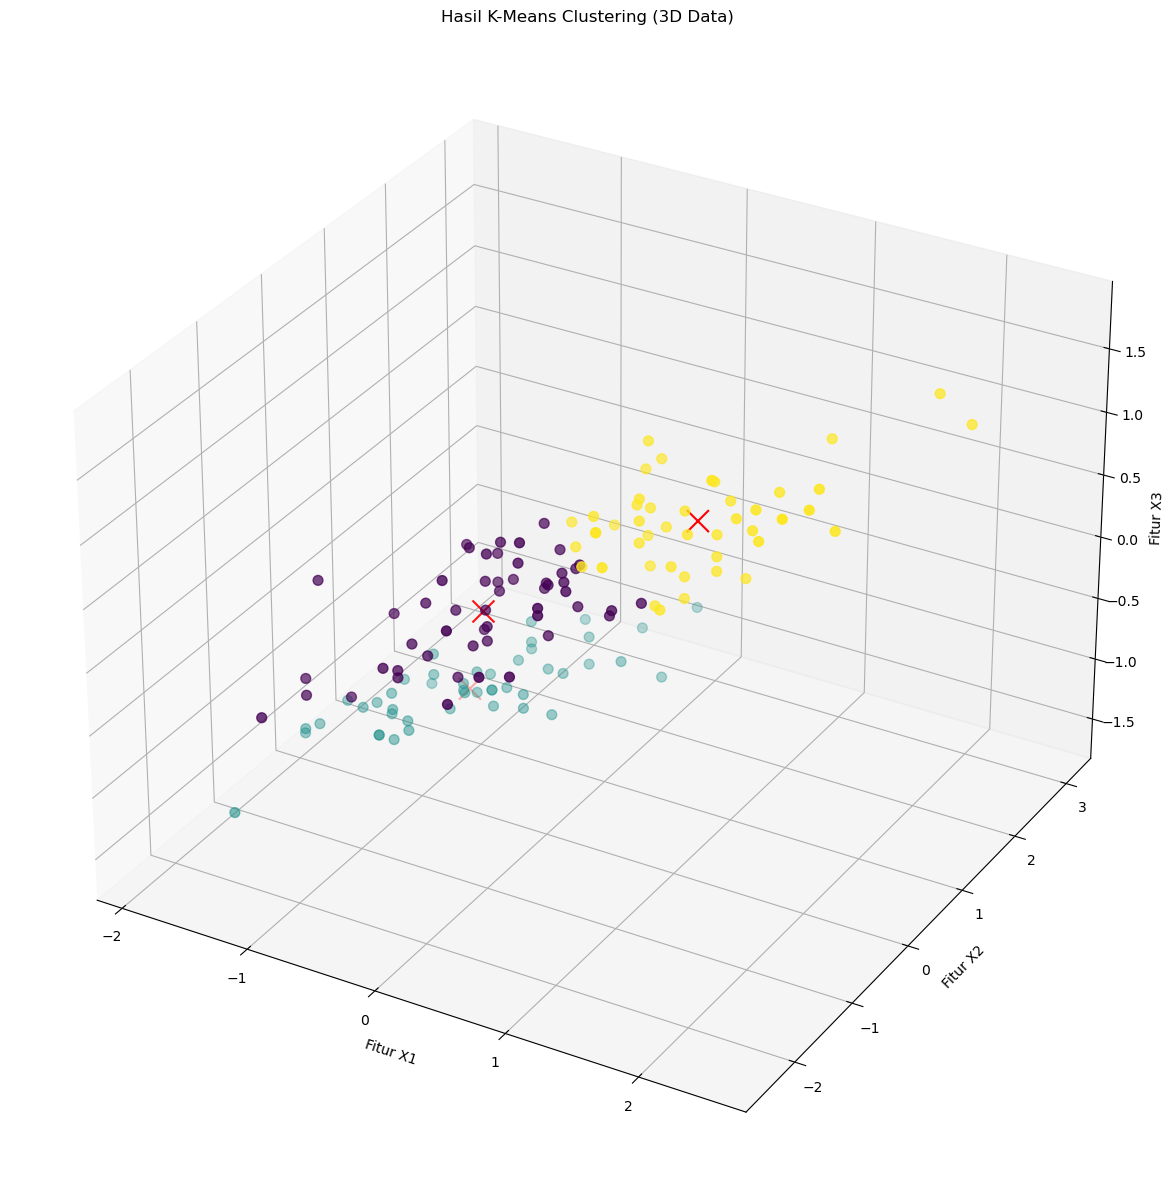

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

num_clusters = 3
# Plot hasil clustering dalam proyeksi tiga dimensi
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Menentukan ukuran titik-titik clustering (misalnya, ukuran 50)
size = 50

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=size*5, c='red', marker='x', label='Centroids')
scatter = ax.scatter(X['SepalLengthCm'], X['SepalWidthCm'], X['PetalLengthCm'], s=size, c=labels, cmap='viridis')


# # Menentukan label-label yang sesuai dengan jumlah cluster (3 clusters)
# cluster_labels = [f'Cluster {i+1}' for i in range(num_clusters)]
# ax.legend(handles=[scatter.legend_elements()[0][0]], labels=cluster_labels)

ax.set_title('Hasil K-Means Clustering (3D Data)')
ax.set_xlabel('Fitur X1')
ax.set_ylabel('Fitur X2')
ax.set_zlabel('Fitur X3')

plt.show()